Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from optlang import Model, Variable, Constraint, Objective

from plot_opt import region_plot, plot_LP

# Programación lineal con variables enteras y reales (Mixed Integer Linear Programming)

## Definición

Recordamos que un **problema de programación lineal** es un **problema de optimización** en el que tanto la **función objetivo** como las **restricciones** son todas **funciones lineales**.

- **ILP** (integer linear programming): un problema de programación **lineal** en el que todas las variables tienen que tomar valores enteros
- **BIP** (binary integer programming): un problema de programación **lineal** en el que todas las variables tienen que tomar los valores 0 o 1.
- **MILP** (Mixed Integer Linear Programming, Programación lineal mixta): es un problema de programación **lineal** en el que se mezclan variables que deben tomar valores enteros, otras que deben tomar valores 0/1 y otras que pueden tomar valores reales.

Para ahorrar saliva, vamos a llamar todos estos problemas **MILP**.

Por ejemplo
$$
\begin{split}
\text{Max: } & x + y \\
 \text{Such that: } & x + 2y \leq 4\\
  & 5x - y \leq 8\\
  & x,y \geq 0 \\
  & x,y \in \mathbb{Z}
\end{split}
$$


### Región factible

Las restricciones delimitan el conjunto de soluciones aceptables, que se denomina **región factible**. Al apilar inecuaciones, tomamos la intersección de varios semiplanos, que delimitan una región del espacio $\mathbb{R}^n$. 

Pero **atención**: la *región factible sólo contiene los puntos que satisfacen las restricciones y que tienen coordenadas enteras*.

0 <= x 0 <= y


/home/pang/p/Curro/upm/optimizacion_y_estadistica/optimizacion-y-estadistica/cuadernos/MILP/plot_opt.py:60: UserWarning: No contour levels were found within the data range.
  ax.contour(X,Y,Z, [], colors='b')


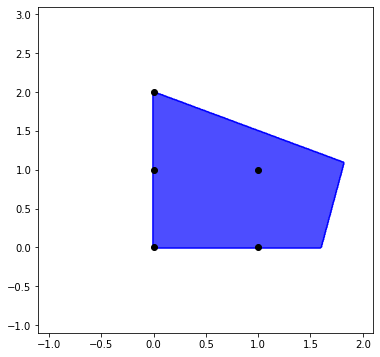

In [2]:
x = Variable('x',lb=0,type='integer')
y = Variable('y',lb=0,type='integer')

xmin, xmax = -1,4
ymin, ymax = -1,4

constraints = [
    Constraint(x+2*y, ub=4),
    Constraint(5*x-y, ub=8)
]

plt.figure(figsize=(6,6))
region_plot(constraints)

Como dijimos, podemos pedir que *algunas* de las variables sean enteras y otras continuas.

$$
\begin{split}
\text{Max: } & x + y \\
 \text{Such that: } & x + 2y \leq 4\\
  & 5x - y \leq 8\\
  & x,y \geq 0 \\
  & x \in \mathbb{R} \\
  & y \in \mathbb{Z}
\end{split}
$$


0 <= x 0 <= y


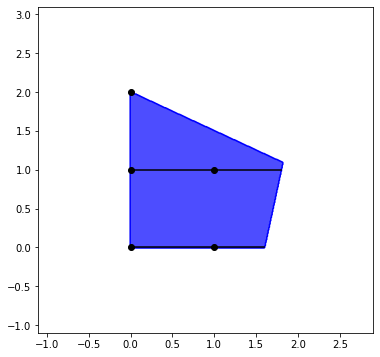

In [3]:
x = Variable('x',lb=0,type='continuous')
y = Variable('y',lb=0,type='integer')

xmin, xmax = -1,4
ymin, ymax = -1,4

constraints = [
    Constraint(x+2*y, ub=4),
    Constraint(5*x-y, ub=8)
]

plt.figure(figsize=(6,6))
region_plot(constraints)

### Plantear el problema

Compara con el ejemplo anterior con variables reales.

In [4]:
x = Variable('x',lb=0,type='integer')
y = Variable('y',lb=0,type='integer')

xmin, xmax = -1,4
ymin, ymax = -1,4

constraints = [
    Constraint(x+2*y, ub=4),
    Constraint(5*x-y, ub=8)
]
obj = Objective(x+y, direction='max')

In [5]:
model = Model(name='My model')
model.objective = obj
model.add(constraints)

status = model.optimize()

print("status:", model.status)
print("objective value:", model.objective.value)

for var_name, var in model.variables.iteritems():
    print(var_name, "=", var.primal)

status: optimal
objective value: 2.0
x = 1.0
y = 1.0


Dibujamos:
- el conjunto de puntos de coordenadas **reales** que satisfacen las restricciones en azul
- el conjunto de puntos de coordenadas **enteras** que satisfacen las restricciones en negro. Ésta la **región factible** y tiene cinco puntos.
- la solución óptima que ha encontrado el software en rojo
- en verde el conjunto de puntos de todo el plano donde la función objetivo toma el valor óptimo.

Observamos que hay **dos puntos** con el valor óptimo dentro de la región factible.

0 <= x 0 <= y


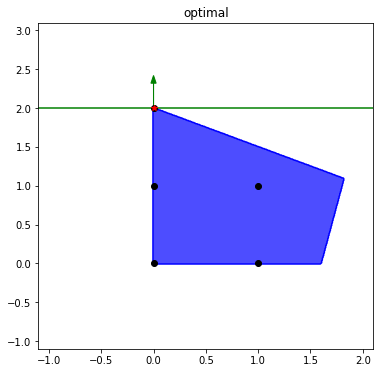

In [6]:
plt.figure(figsize=(6,6))
plot_LP(model)

### "Relajación" del problema MILP

- La **relajación** de un problema MILP es el problema LP que tiene las mismas restricciones y la misma función objetivo, pero se permite que todas las variables tomen valores reales.

Dado que los problemas LP son fáciles de resolver, es natural pretender resolver el problema *relajado*, y después *redondear* el resultado. En algunos casos, esta técnica funciona, pero a veces también puede ocurrir:

- Podemos encontrar una solución factible que no es óptima.
- Podemos encontrar una solución que no es factible.

#### Ejemplo

Este problema es **inviable**: no hay ningún punto con cordenadas enteras factible.
$$
\begin{split}
\text{Max: } & x + y \\
 \text{Such that: } & 4x + 4y \geq 1\\
  & 4x + 4y \leq 7\\
  & 4x - 4y \geq -3\\
  & 4x - 4y \leq 3\\
  & x,y \in \mathbb{Z}
\end{split}
$$

In [7]:
x = Variable('x',lb=0,type='integer')
y = Variable('y',lb=0,type='integer')

xmin, xmax = -1,4
ymin, ymax = -1,4

constraints = [
    Constraint(4*x+4*y, lb=1, ub=7),
    Constraint(4*x-4*y, lb=-3, ub=3)
]
obj = Objective(x+y, direction='max')

model = Model(name='My model')
model.objective = obj
model.add(constraints)

status = model.optimize()

print("status:", model.status)
print("objective value:", model.objective.value)

for var_name, var in model.variables.iteritems():
    print(var_name, "=", var.primal)

status: infeasible
objective value: 0.0
x = 0.0
y = 0.0


0 <= x 0 <= y


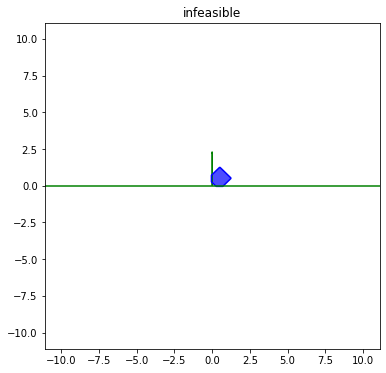

In [9]:
plt.figure(figsize=(6,6))
plot_LP(model)

#### Ejemplo MILP

Ya hemos mencionado que es posible, y a veces es necesario, mezclar variables enteras y variables reales.

Observa el siguiente problema: ¿es factible?
$$
\begin{split}
\text{Max: } & x + y \\
 \text{Such that: } & 4x + 4y \geq 1\\
  & 4x + 4y \leq 7\\
  & 4x - 4y \geq -3\\
  & 4x - 4y \leq 3\\
  & x \in \mathbb{Z}
\end{split}
$$

Cuando no se indique explícitamente, se asume que las variables con reales: $y\in\mathbb{R}$.

In [10]:
x = Variable('x',lb=0,type='integer')
y = Variable('y',lb=0,type='continuous')

xmin, xmax = -1,4
ymin, ymax = -1,4

constraints = [
    Constraint(4*x+4*y, lb=1, ub=7),
    Constraint(4*x-4*y, lb=-3, ub=3)
]
obj = Objective(x+y, direction='max')

model = Model(name='My model')
model.objective = obj
model.add(constraints)

status = model.optimize()

print("status:", model.status)
print("objective value:", model.objective.value)

for var_name, var in model.variables.iteritems():
    print(var_name, "=", var.primal)

status: optimal
objective value: 1.75
x = 1.0
y = 0.75


0 <= x 0 <= y


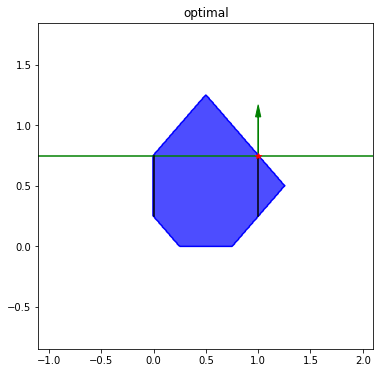

In [11]:
plt.figure(figsize=(6,6))
plot_LP(model)

## Clasificación de problemas MILP

Un problema MILP puede ser de uno de los siguientes tipos:

 - Inviable: la región factible es vacía (ninguna estrategia satisface todas las restricciones).
 - Solución única: el valor óptimo de la función objetivo se obtiene en un único punto de la región factible. Atención: la región factible puede ser no acotada, pero que aún así haya solución única.
 - Solución múltiple: el valor óptimo de la función objetivo se obtiene en al menos dos puntos de la región factible. En problemas MILP, _el óptimo se puede alcanzar en una cantidad finita o infinita de puntos_. Atención: la región factible puede ser no acotada, pero que aún así haya solución múltiple, pero con un valor óptimo finito.
 - Problema no acotado: la región factible no está acotada, y además es posible moverse dentro de la región factible de modo que el valor de la función objetivo crezca sin límite (para un problema de maximización) o que decrezca sin límite (para un problema de minimización).

### Ejercicio 1

Plantea el problema anterior con variables enteras e interpreta la solución que devuelve el programa:

$$
\begin{split}
\text{Max: } & x + y \\
 \text{Such that: } & 4x + 4y \geq 1\\
  & 4x + 4y \leq 7\\
  & 4x - 4y \geq -3\\
  & 4x - 4y \leq 3\\
  & x,y \in \mathbb{Z}
\end{split}
$$

### Ejercicio 2

Plantea el problema anterior con variables mixtas e interpreta la solución que devuelve el programa:

$$
\begin{split}
\text{Max: } & x + y \\
 \text{Such that: } & 4x + 4y \geq 1\\
  & 4x + 4y \leq 7\\
  & 4x - 4y \geq -3\\
  & 4x - 4y \leq 3\\
  & x \in \mathbb{Z}, y\in\mathbb{R}
\end{split}
$$

### Ejercicio 3

Resuelve el problema

$$
\begin{split}
\text{Max: } & x + y\\
 \text{Such that: } & x - 3y \leq 4\\
  & 5x - y \geq 8\\
  & x,y \geq 0 \\
  & x,y \in \mathbb{Z}
\end{split}
$$

Interpreta el resultado.

### Ejercicio 4

Resuelve el problema

$$
\begin{split}
\text{Min: } & x + y\\
 \text{Such that: } & x - 3y \leq 4\\
  & 5x - y \geq 8\\
  & x,y \geq 0 \\
  & x,y \in \mathbb{Z}
\end{split}
$$

*Observación*: son las mismas restricciones y la misma función objetivo que antes, pero se trata de minimizar. Recuerda que puedes plantear un problema de minimización usando

```python
Objective(objetivo, direction='min')
```

### Ejercicio 5

Hemos visto un ejemplo en el que el problema relajado tenía solución única pero el problema MILP tenía solución múltiple.
 ¿Crees que es posible que ocurra lo contrario: que el problema relajado tenga solución múltiple pero el problema MILP tenga solución única?

## Glosario en inglés

- **problema de optimización**: *optimization problem*
- **función objetivo**: *objective function*
- **restricciones**: *constraints*
- **problema de programación lineal**: *linear programming problem*
- **función lineal**: *linear function*
- **región convexa**: *convex region*
- **región factible**: *feasible region*
- **región acotada**: *bounded region*
- **región no acotada**: *unbounded region*
- **problema no acotado**: *unbounded problem*
- **relajación**: *relaxation*

## Para aprender más

Leed las secciones 1 al 5 (no hace falta que miréis los algoritmos)
- [Programación en enteros en Wikipedia](https://es.wikipedia.org/wiki/Programaci%C3%B3n_en_enteros)
- [Integer programming in Wikipedia](https://en.wikipedia.org/wiki/Integer_programming)